# Data Mining Project - KNN

## Introduction
In this experiement, Adults's income related data set is being analysed and appy K-NN (Kth Nearest Neighbor) classification method to build the classification model. Classification task is to predict when a random person's data is given, to predict wether his income is higher than 50K USD or not.

Python libraries such as scikit-learn, graphviz, matplotlib has been used for the experiement and differnt small experiments are being done in order to achieve the optimized model.

## KNN Method
Decision Tree is a very simple but elegent algorithm where each node represent an attribute, each branch represents a decision rule and leaf nodes are stands for class attributes. Once the decision tree is formed, tree itself become the model and for any given new data instance, it traverse through the tree by comparing it's attribute values at each internal nodes and reach out to the leaf where it finds the predicted attribute.


In [1]:
# Import all the required Python libraries.
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import itertools

In [2]:
# Load the 'Adult' data set from the csv file.
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']

data_frame = pd.read_csv("adult.data", header=None, names=col_names)


In [3]:
data_frame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Fill any missing value, as it stated that there may be missing values in the data set.
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit_transform(data_frame)

array([[39, ' State-gov', 77516, ..., 40, ' United-States', ' <=50K'],
       [50, ' Self-emp-not-inc', 83311, ..., 13, ' United-States',
        ' <=50K'],
       [38, ' Private', 215646, ..., 40, ' United-States', ' <=50K'],
       ...,
       [58, ' Private', 151910, ..., 40, ' United-States', ' <=50K'],
       [22, ' Private', 201490, ..., 20, ' United-States', ' <=50K'],
       [52, ' Self-emp-inc', 287927, ..., 40, ' United-States', ' >50K']],
      dtype=object)

In [5]:
# Convert categorical data inot numerical data

enc = LabelEncoder()
enc.fit(data_frame['workclass'])
data_frame['workclass'] = enc.transform(data_frame['workclass'])

enc.fit(data_frame['education'])
data_frame['education'] = enc.transform(data_frame['education'])

enc.fit(data_frame['marital-status'])
data_frame['marital-status'] = enc.transform(data_frame['marital-status'])

enc.fit(data_frame['occupation'])
data_frame['occupation'] = enc.transform(data_frame['occupation'])

enc.fit(data_frame['relationship'])
data_frame['relationship'] = enc.transform(data_frame['relationship'])

enc.fit(data_frame['race'])
data_frame['race'] = enc.transform(data_frame['race'])

enc.fit(data_frame['sex'])
data_frame['sex'] = enc.transform(data_frame['sex'])

enc.fit(data_frame['hours-per-week'])
data_frame['hours-per-week'] = enc.transform(data_frame['hours-per-week'])

enc.fit(data_frame['native-country'])
data_frame['native-country'] = enc.transform(data_frame['native-country'])

enc.fit(data_frame['label'])
data_frame['label'] = enc.transform(data_frame['label'])

data_frame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,7,77516,9,13,4,1,1,4,1,2174,0,39,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,12,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,39,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,39,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,39,5,0


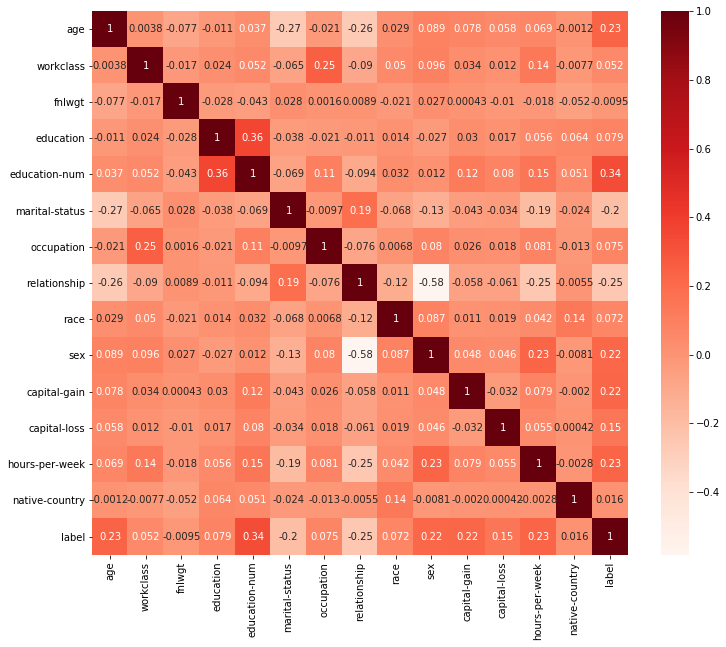

In [6]:
# Feature Selection

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data_frame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
#Correlation with output variable
cor_target = abs(cor["label"])
cor_target

#Selecting highly correlated feature attributes with 
relevant_features = cor_target[cor_target > 0.18]
relevant_features

age               0.234037
education-num     0.335154
marital-status    0.199307
relationship      0.250918
sex               0.215980
capital-gain      0.223329
hours-per-week    0.232393
label             1.000000
Name: label, dtype: float64

In [8]:

# Seperate out feature attributes and target attribute.
feature_cols = ['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'hours-per-week']

# Get feature attributes set and Normailize them. 
# Normalizing is essntial as distance calculation happen in the next step.

feature_data = data_frame[feature_cols] 
transformer = Normalizer().fit(feature_data) 
X = transformer.transform(feature_data)

# Get the target attribute.
y = data_frame.label

#Split the data set, in to train(70%) and test(30%) Holdout Method.
train, test, train_label, test_label = train_test_split(X, y, test_size=0.3)

In [9]:
# Perform the Repeated holdout method and get some average measures.

epochs = 10
total_acc = 0
total_error = 0
for i in range(epochs):    
    train, test, train_label, test_label = train_test_split(X, y, test_size=0.3)
    knn_classifire = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree')
    knn_model = knn_classifire.fit(train, train_label)
    knn_test_pred = knn_model.predict(test)
    knn_accuracy = accuracy_score(test_label, knn_test_pred);
    knn_mse = mean_squared_error(test_label, knn_test_pred);
    total_acc = total_acc + knn_accuracy
    total_error = total_error + knn_mse
    print(i, knn_accuracy, knn_mse)

    
avg_acc = total_acc /  epochs
avg_mse = total_error / epochs

print("Avergae Accuracy: ", avg_acc)
print("Avergae Error: ", avg_mse)

0 0.8340669464633023 0.1659330535366977
1 0.8339645818405159 0.16603541815948408
2 0.8256730473948204 0.17432695260517966
3 0.8276179752277613 0.1723820247722387
4 0.8353976865595251 0.16460231344047496
5 0.8245470365441704 0.17545296345582967
6 0.8360118742962432 0.1639881257037568
7 0.8339645818405159 0.16603541815948408
8 0.8270037874910431 0.17299621250895691
9 0.8301770907974204 0.16982290920257959
Avergae Accuracy:  0.8308424608455318
Avergae Error:  0.1691575391544682


In [10]:
# Create K-Nearest Neighbor classifer object.
knn_classifire = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree')

# Train Naive Bayes Classifer and get the model.
knn_model = knn_classifire.fit(train, train_label)

#Predict the response for test dataset
knn_test_pred = knn_model.predict(test)
knn_test_probs = knn_model.predict_proba(test)[:, 1]

knn_train_pred = knn_model.predict(train)
knn_train_probs = knn_model.predict_proba(train)[:, 1]

In [11]:
# Calculate Accurcy and Confusion Matrix for Naive Bayes method.
knn_accuracy = accuracy_score(test_label, knn_test_pred);
print("KNN Accuracy:",knn_accuracy)

knn_confusion_matrix = confusion_matrix(test_label, knn_test_pred)
print("KNN Confusion Matrix:")
print(knn_confusion_matrix)

KNN Accuracy: 0.8301770907974204
KNN Confusion Matrix:
[[6933  472]
 [1187 1177]]


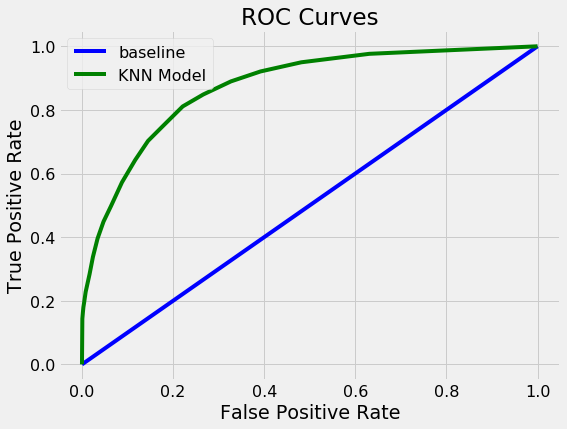

In [12]:
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

# Calculate false positive rates and true positive rates
base_fpr, base_tpr, _ = roc_curve(test_label, [1 for _ in range(len(test_label))])
knn_model_fpr, knn_model_tpr, _ = roc_curve(test_label, knn_test_probs)

plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
    
# Plot both curves.
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(knn_model_fpr, knn_model_tpr, 'g', label = 'KNN Model')

plt.legend();
plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[6933  472]
 [1187 1177]]


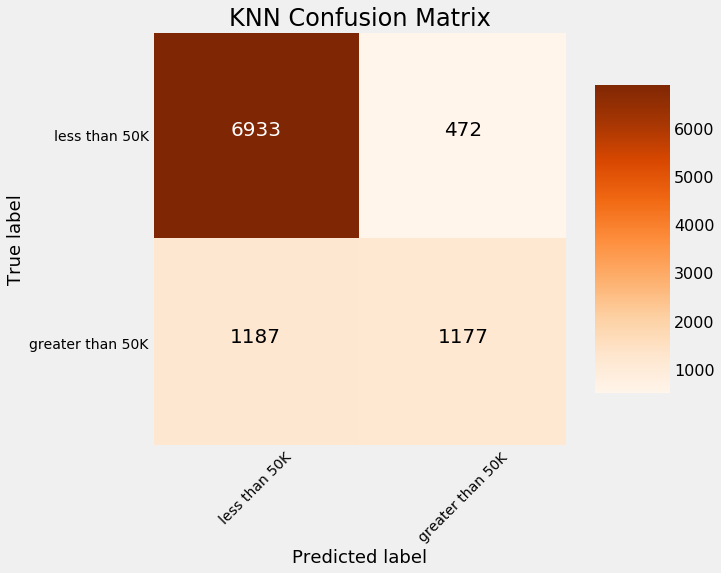

In [14]:
plot_confusion_matrix(knn_confusion_matrix, classes = ['less than 50K', 'greater than 50K'],
                      title = 'KNN Confusion Matrix')